In [66]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=False)
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['CMU Sans Serif']
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 1200
plt.ion()
import pandas as pd
import numpy  as np
%matplotlib inline
import math
import glob
import re
rcParams['figure.figsize'] = 14,4

In [67]:
start = 21 # skip transient
T     = 252*50

In [68]:
def USD(x): return x

s = "../cmake-build-release/output/volatility_illustration"
#s = "../cmake-build-release/output/experiment_2_statistics"

P = []
with open(s +'/prices.txt', 'r') as content_file:
    for l in content_file.readlines():
        P.append(float(l.split('USD(')[1].split(')')[0]))
offset_prices = 0 
prices = np.array(P)[offset_prices:-1]

volatility = np.std(np.log( prices.flatten()[1:] 
                          / prices.flatten()[:-1])
                          ) / (np.sqrt(1/252))

D = []
with open(s +'/0_dividend.txt', 'r') as content_file:
    for l in content_file.readlines():
        D.append(float(l.split(',')[1].split(')')[0]))
dividends = np.array(D)[offset_prices::2] 

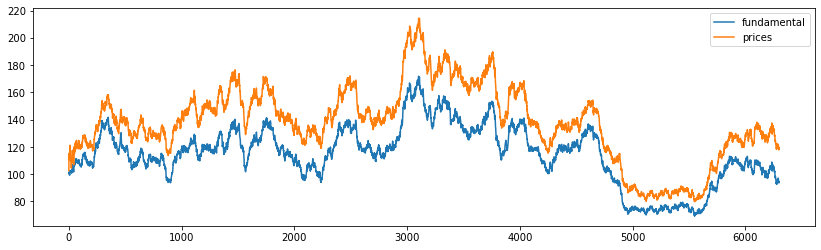

In [69]:
end = 1
plt.plot(dividends[0:T] / (1.01**(1/252)-1),  label='fundamental')
plt.plot(prices[0:T:2], label='prices')
#plt.xlim([0, min(len(prices), len(dividends))])
#plt.yscale('log')
plt.legend()

Text(0, 0.5, 'correlation coefficient')

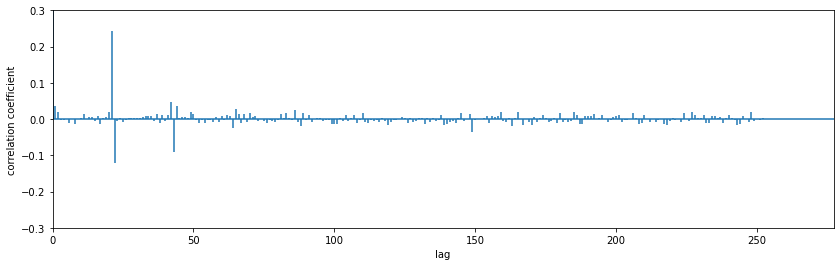

In [70]:
plt.acorr(np.diff(np.log(prices[252:T])),maxlags=252)
plt.xlim([0,None])
plt.ylim([-0.3,0.3])
plt.xlabel("lag")
plt.ylabel("correlation coefficient")

Text(0, 0.5, 'correlation coefficient')

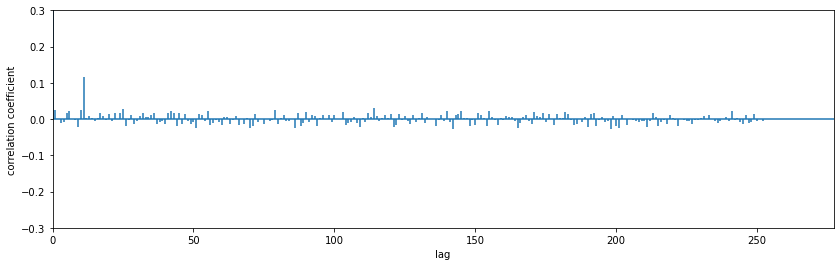

In [71]:
plt.acorr(np.diff(np.log(dividends[252:])),maxlags=252)
plt.xlim([0,None])
plt.ylim([-0.3,0.3])
plt.xlabel("lag")
plt.ylabel("correlation coefficient")

In [72]:
R = prices[1*252:T]

In [73]:
std = (np.exp(np.std(np.diff(np.log(R))))-1) * np.sqrt(252)

In [74]:
mu = (np.exp(np.mean(np.diff(np.log(R)))))**(252)-1

In [75]:
(mu-0.02)/std, mu, std

(-0.21557191094275793, -0.0011340811642627235, 0.09803726780468434)

In [76]:
def readsignal(fund):
    P = []
    with open(s +f'/_{fund}__signal.txt', 'r') as content_file:
        for l in content_file.readlines():
            P.append(float(l.split(',')[1].split(')')[0]))
    prices = np.array(P)
    return prices

In [77]:
len(readsignal(2))

12598

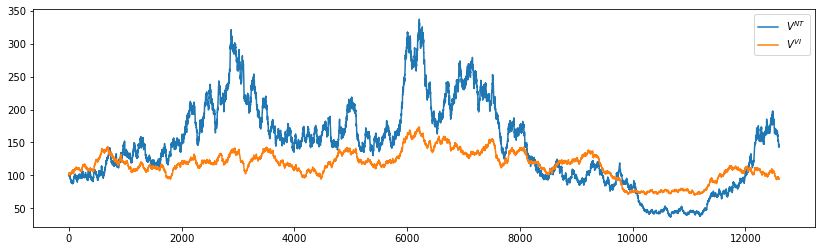

In [78]:
plt.plot(readsignal(2), label='$V^{NT}$')
plt.plot(readsignal(3), label='$V^{VI}$')
plt.legend()

In [79]:
def readnet_asset_value(fund):
    P = []
    with open(s +f'/_{fund}__net_asset_value.txt', 'r') as content_file:
        for l in content_file.readlines():
            P.append(float(l.split('USD(')[1].split(')')[0]))
    prices = np.array(P)
    offset_prices = 252    
    volatility = np.std(np.log( prices.copy().flatten()[offset_prices:][1:] 
                              / prices.copy().flatten()[offset_prices:][:-1])
                              ) / (np.sqrt(1/252))
    
    return prices

In [64]:
def readpnl(fund):
    P = []
    with open(s +f'/_{fund}__pnl.txt', 'r') as content_file:
        for l in content_file.readlines():
            P.append(float(l.split('USD(')[1].split(')')[0]))
    prices = np.array(P)
    return prices

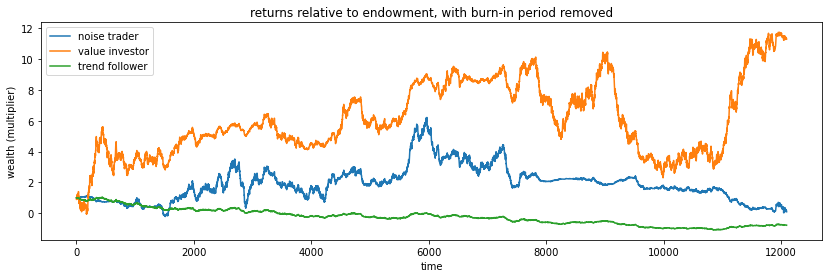

In [65]:
stop = T

concentrations = [0.4, 0.3, 0.3]

NAV2 = concentrations[0] * 200_000_000 + 10 * readpnl(2)[start:stop].cumsum()
NAV3 = concentrations[1] * 200_000_000 + 10 * readpnl(3)[start:stop].cumsum()
NAV4 = concentrations[2] * 200_000_000 + 10 * readpnl(4)[start:stop].cumsum()

stop = min(stop-start, len(NAV2), len(NAV3), len(NAV4))

NAV2 = concentrations[0] * 200_000_000 + 10 * readpnl(2)[start:stop].cumsum()
NAV3 = concentrations[1] * 200_000_000 + 10 * readpnl(3)[start:stop].cumsum()
NAV4 = concentrations[2] * 200_000_000 + 10 * readpnl(4)[start:stop].cumsum()

plt.plot(NAV2/NAV2[0], label="noise trader")
plt.plot(NAV3/NAV3[0], label="value investor")
plt.plot(NAV4/NAV4[0], label="trend follower")
#plt.plot(NAV5/NAV5[0], label="Kelly bettor")
plt.ylabel("wealth (multiplier)")
plt.xlabel("time")
plt.title("returns relative to endowment, with burn-in period removed")
plt.legend()